### Artificial Neural Network Image Classifier

This classifier is built based on the k_mnist dataset which is available at  https://www.tensorflow.org/datasets/catalog/kmnist. More details about this dataset are here: https://github.com/rois-codh/kmnist. For this classifier, I am limiting myself to only using dense ANNs rather than advanced CNNs.

#### Import relevant packages

In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.9.0


#### Load the dataset `kmnist` from `tensorflow_datasets`. Combine and split the entire dataset into 60% for training and 40% for testing.

In [2]:
import tensorflow_datasets as tfds

(train_dataset, test_dataset), dataset_info = tfds.load("kmnist", as_supervised=True, with_info = True, split=['train', 'test'])

In [3]:
# Calculate the number of images for 60% training and 40% testing
dataset_size = dataset_info.splits['train'].num_examples + dataset_info.splits['test'].num_examples # Total of 70,000 images
train_size,  test_size = int(0.6 * dataset_size), int(0.4 * dataset_size)

# Combine and shuffle the train and test datasets into one dataset (For true randomness, we set the shuffle buffer to the full dataset size)
dataset = train_dataset.concatenate(test_dataset).shuffle(dataset_size)

# Split the full dataset into 60% train and 40% test
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size).take(test_size)

# Unpack the train and test datasets into images and labels
def split_images_labels(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(image)
        labels.append(label)
    return tf.data.Dataset.from_tensor_slices((images, labels))

train_images_labels = split_images_labels(train_dataset)
test_images_labels = split_images_labels(test_dataset)

# Further split into separate images and labels
train_images, train_labels = zip(*list(train_images_labels))
test_images, test_labels = zip(*list(test_images_labels))

# Convert to tensors (since the zip returns tuples)
train_images = tf.convert_to_tensor(train_images)
train_labels = tf.convert_to_tensor(train_labels)
test_images = tf.convert_to_tensor(test_images)
test_labels = tf.convert_to_tensor(test_labels)

In [4]:
# Normalize pixel values between 0 and 1
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

In [5]:
# Check shapes of training and test images and labels
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(42000, 28, 28, 1) (42000,)
(28000, 28, 28, 1) (28000,)


#### Building the ANN

In [6]:
model = tf.keras.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))     # input layer, reshape to 1D array with 28*28=784 elements
model.add(layers.Dense(64, activation="relu"))      # one hidden layer with 64 nodes
model.add(layers.Dense(64, activation="relu"))      # one hidden layer with 64 nodes
model.add(layers.Dense(64, activation="relu"))      # one hidden layer with 64 nodes
model.add(layers.Dense(10, activation="softmax"))   # one output layer with 10 outputs

model.summary()

c:\Users\marti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and train the model. We use cross entropy for the loss function (best for classification problems with multiple classes and integer labels).

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7530 - loss: 0.7942
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9145 - loss: 0.2750
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9373 - loss: 0.2053
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9508 - loss: 0.1573
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9577 - loss: 0.1345
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9642 - loss: 0.1125
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9701 - loss: 0.0931
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0824
Epoch 9/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9797 - loss: 0.0654
Epoch 10/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9796 - loss: 0.0610
Epoch 11/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9820 - loss: 0.0529
Epoch 12/20
1313/1313 ━━━━━━━━

#### Plot the training loss across different epochs

[0.5222427248954773, 0.2704598009586334, 0.2071046531200409, 0.16930270195007324, 0.14110982418060303, 0.12175694108009338, 0.10012108087539673, 0.09076782315969467, 0.07393527030944824, 0.0661282166838646, 0.060270629823207855, 0.054745882749557495, 0.04589855298399925, 0.04437185078859329, 0.042501989752054214, 0.04203822463750839, 0.03956285119056702, 0.03316459059715271, 0.036122482270002365, 0.03571353480219841]


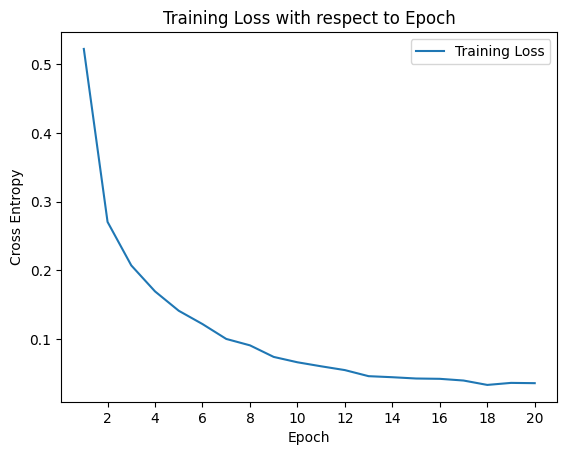

In [9]:
loss = history.history['loss']
print(loss)

plt.plot(range(1, len(loss)+1), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training Loss with respect to Epoch')
plt.xlabel('Epoch')
plt.xticks(range(2, 21, 2))
plt.show()

#### Overall Accuracy and Per-class Accuracy on Test Dataset

In [10]:
# Computing Overall Test Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', round(test_acc, 4))

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9646 - loss: 0.1892
Test Accuracy: 0.9629


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
(28000, 10)


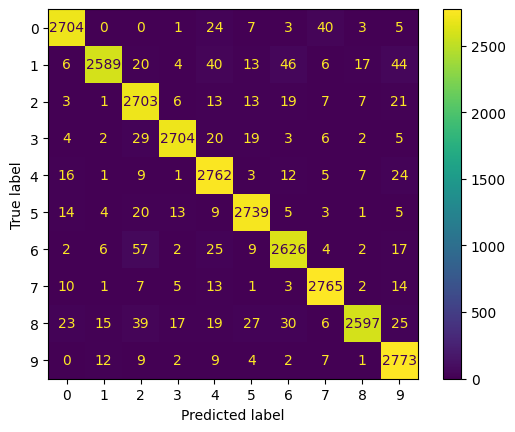

Test Accuracy for class 0 to 9:
[0.9702, 0.9296, 0.9678, 0.9678, 0.9725, 0.9737, 0.9549, 0.9801, 0.9282, 0.9837]


In [11]:
# Computing Test Accuracy per-class
predictions = model.predict(test_images)
print(predictions.shape)

predictions = np.argwhere(predictions==np.amax(predictions, 1, keepdims=True))
test_pred = np.hsplit(predictions, 2)[1]

confmat = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(confmat)
disp.plot()
plt.show()

class_acc = [round(confmat[i][i] / sum(confmat[i]), 4) for i in range(10)]

print("Test Accuracy for class 0 to 9:")
print(class_acc)

#### Visualize Predictions

**The 10 classes of Kuzushiji-MNIST**\
Hiragana and their Transliterations
1) お (o)
2) き (ki)
3) す (su)
4) つ (tsu) 
5) な (na)
6) は (ha)
7) ま (ma)
8) や (ya)
9) れ (re)
10) を (wo)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


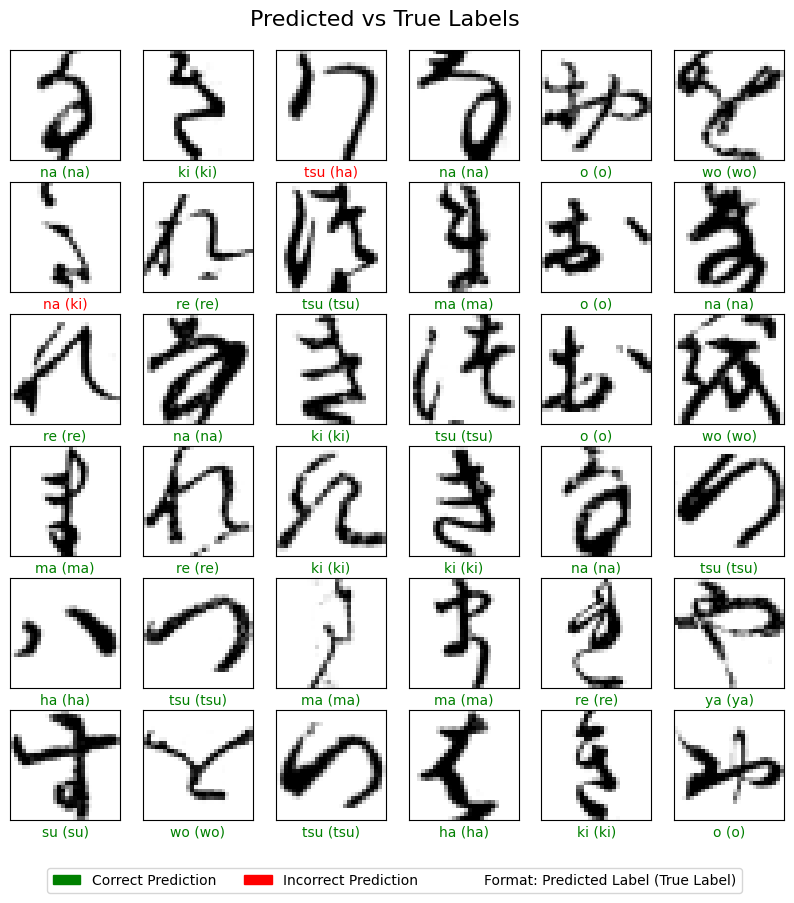

In [12]:
# Code to visualize predictions
predictions = model.predict(test_images)

class_names = [
    "o",    # class 0
    "ki",   # class 1
    "su",   # class 2
    "tsu",  # class 3
    "na",   # class 4
    "ha",   # class 5
    "ma",   # class 6
    "ya",   # class 7
    "re",   # class 8
    "wo"    # class 9
]

plt.figure(figsize=(10,10))
plt.suptitle("Predicted vs True Labels", fontsize=16, y=0.92)

for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

legend_patches = [Patch(color='green', label='Correct Prediction'),
                  Patch(color='red', label='Incorrect Prediction'),
                  Patch(color='none', label="Format: Predicted Label (True Label)")]
plt.figlegend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.51, 0.03), ncol=3)

plt.show()